## **REGRESIÓN LINEAL MÚLTIPLE**

✅ Features seleccionadas: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']
✅ RMSE: 13.279
✅ R² Score: 0.800
📊 R² promedio CV: 0.792 ± 0.010


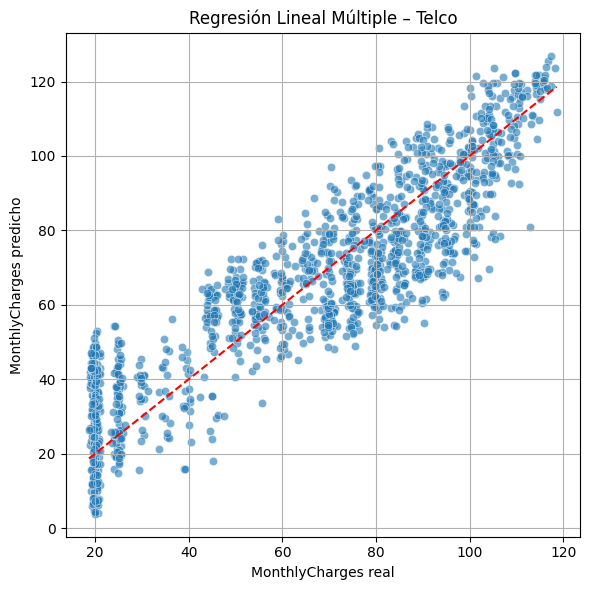

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("teleco_clean.csv")

target = 'MonthlyCharges'
y = df[target]
X = df.drop(columns=[target, 'Churn']) 


#Eliminar outliers solo en variables numéricas relevantes
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

y = df[target]
X = df.drop(columns=[target, 'Churn'])

scaler = StandardScaler()
X[['tenure', 'TotalCharges']] = scaler.fit_transform(X[['tenure', 'TotalCharges']])

#Selección de las mejores características
selector = SelectKBest(score_func=f_regression, k=15)
X_sel = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Features seleccionadas:", selected_features.tolist())

X_train, X_test, y_train, y_test = train_test_split(
    X_sel, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"✅ RMSE: {rmse:.3f}")
print(f"✅ R² Score: {r2:.3f}")

cv_scores = cross_val_score(model, X_sel, y, cv=5, scoring='r2')
print(f"📊 R² promedio CV: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("MonthlyCharges real")
plt.ylabel("MonthlyCharges predicho")
plt.title("Regresión Lineal Múltiple – Telco")
plt.grid(True)
plt.tight_layout()
plt.show()


## **REGRESIÓN LOGISTICA**

✅ Variables seleccionadas: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
📊 Matriz de Confusión:
[[715 318]
 [ 71 303]]

📋 Clasification Report:
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1033
           1       0.49      0.81      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.72      0.74      1407

🔥 ROC AUC: 0.829


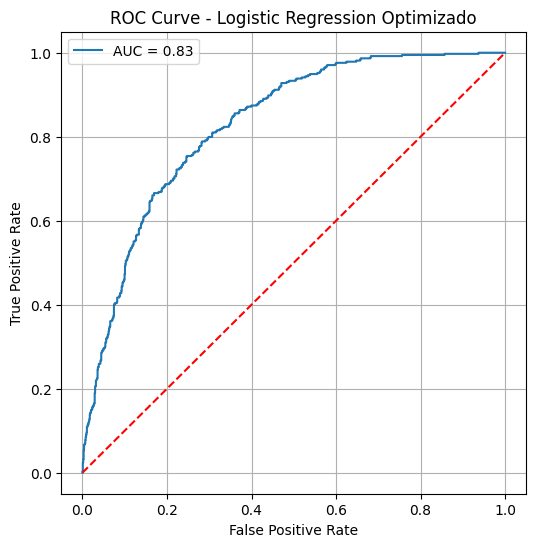

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("teleco_clean.csv") 
df = df.dropna()

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.dropna(inplace=True)

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]

X = df.drop(columns=['Churn'])
y = df['Churn']

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

selector = SelectKBest(score_func=f_classif, k=15)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)
selected_features = X_train.columns[selector.get_support()]
print("✅ Variables seleccionadas:", selected_features.tolist())

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_sel, y_train)

y_pred = model.predict(X_test_sel)
y_proba = model.predict_proba(X_test_sel)[:,1]

print("📊 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\n📋 Clasification Report:")
print(classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_proba)
print(f"🔥 ROC AUC: {auc:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression Optimizado")
plt.legend()
plt.grid(True)
plt.show()


## **K-MEANS**

k = 2, Silhouette Score = 0.148
k = 3, Silhouette Score = 0.134
k = 4, Silhouette Score = 0.144
k = 5, Silhouette Score = 0.144
k = 6, Silhouette Score = 0.133
k = 7, Silhouette Score = 0.107
k = 8, Silhouette Score = 0.098
k = 9, Silhouette Score = 0.100
k = 10, Silhouette Score = 0.105

✅ Mejor número de clústeres: k = 2 con Silhouette Score = 0.148


C:\Users\srtaa\AppData\Local\Temp\ipykernel_3436\713979580.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Clúster")


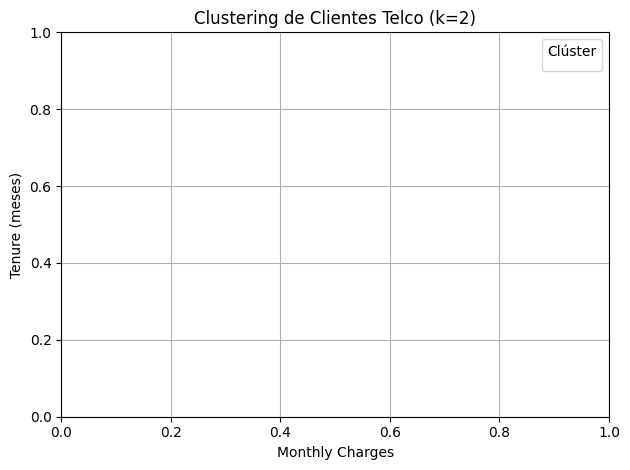

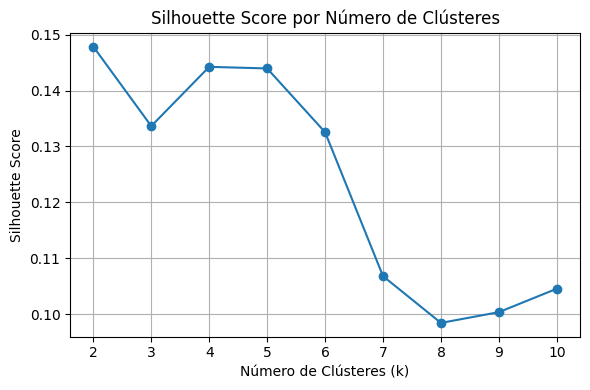

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar datos
df = pd.read_csv("teleco_clean.csv")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

#Calcular Silhouette Score para varios k
sil_scores = []
range_k = range(2, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.3f}")

#Elegir mejor k
best_k = range_k[np.argmax(sil_scores)]
best_score = max(sil_scores)
print(f"\n✅ Mejor número de clústeres: k = {best_k} con Silhouette Score = {best_score:.3f}")

#Aplicar KMeans final
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.title(f"Clustering de Clientes Telco (k={best_k})")
plt.xlabel("Monthly Charges")
plt.ylabel("Tenure (meses)")
plt.grid(True)
plt.legend(title="Clúster")
plt.tight_layout()
plt.show()


# 10. Gráfico Silhouette vs k
plt.figure(figsize=(6, 4))
plt.plot(range_k, sil_scores, marker='o')
plt.title("Silhouette Score por Número de Clústeres")
plt.xlabel("Número de Clústeres (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()


## **ARBOL DE DECISIÓN**

Fitting 5 folds for each of 90 candidates, totalling 450 fits
✅ Mejor configuración: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
✅ ROC AUC Score: 0.816

📊 Matriz de Confusión:
 [[773 260]
 [101 273]]

📋 Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81      1033
           1       0.51      0.73      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.74      0.76      1407



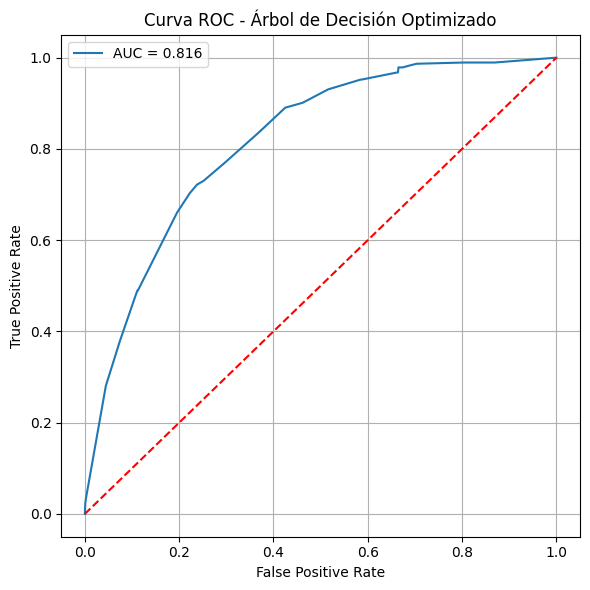

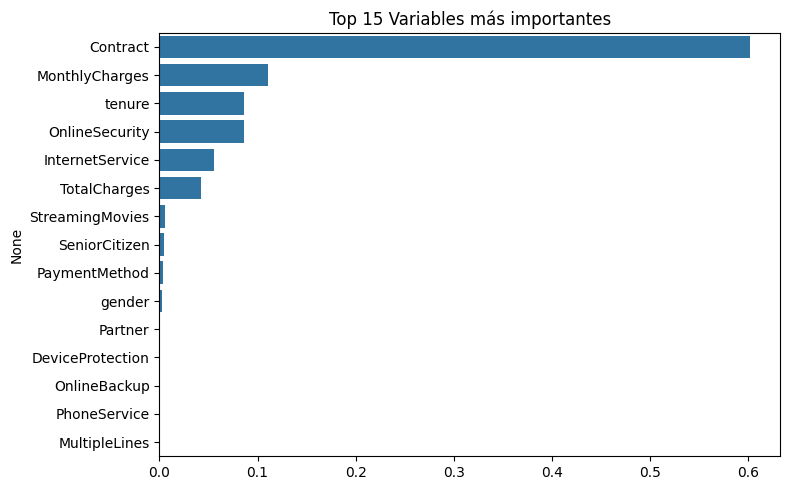

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar y limpiar datos
df = pd.read_csv("teleco_clean.csv")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#Eliminar outliers en variables numéricas
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

X = df.drop(columns=['Churn'])
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_proba)
print(f"✅ Mejor configuración: {grid.best_params_}")
print(f"✅ ROC AUC Score: {auc:.3f}\n")
print("📊 Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Reporte de Clasificación:\n", classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Árbol de Decisión Optimizado")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Importancia de variables
importances = pd.Series(best_model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)
    
plt.figure(figsize=(8, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 15 Variables más importantes")
plt.tight_layout()
plt.show()


## **RANDOM FOREST**


📊 Matriz de Confusión:
 [[823 210]
 [109 265]]

📋 Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      1033
           1       0.56      0.71      0.62       374

    accuracy                           0.77      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.80      0.77      0.78      1407


✅ ROC AUC Score: 0.833


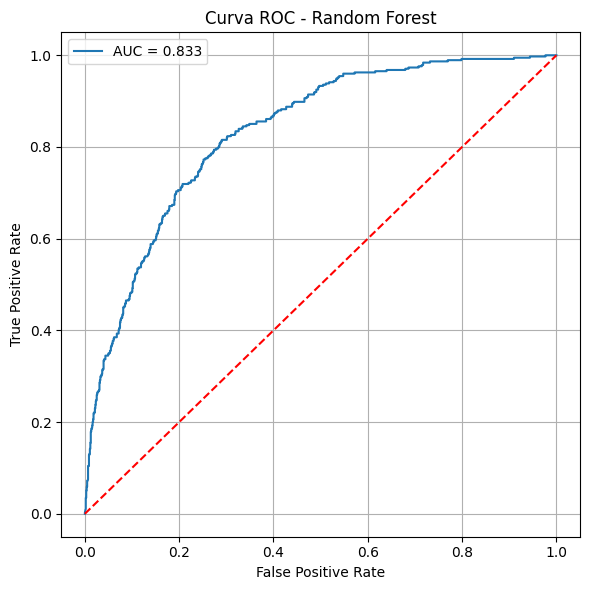

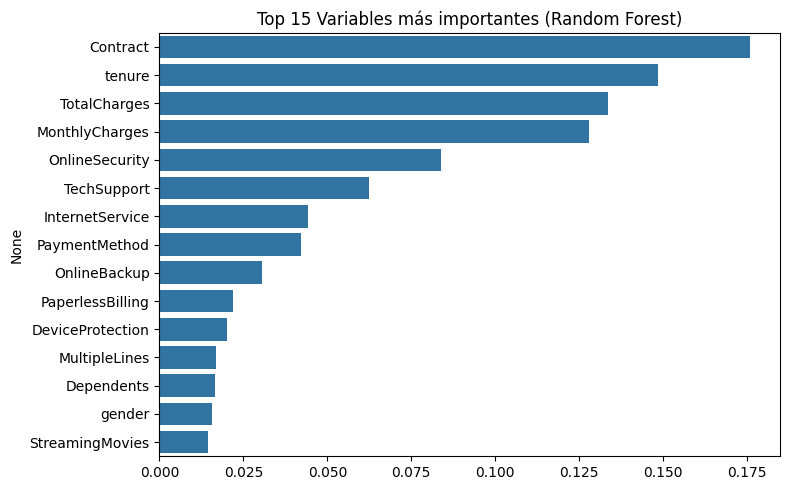

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar y limpiar datos
df = pd.read_csv("teleco_clean.csv")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

X = df.drop(columns=['Churn'])
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("\n📊 Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Reporte de Clasificación:\n", classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_proba)
print(f"\n✅ ROC AUC Score: {auc:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Importancia de variables
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 15 Variables más importantes (Random Forest)")
plt.tight_layout()
plt.show()
